## Data Description
- h1n1_concern - Level of concern about the H1N1 flu. \
0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
- h1n1_knowledge - Level of knowledge about H1N1 flu. \
0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
- behavioral_antiviral_meds - Has taken antiviral medications. (binary)
- behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)
- behavioral_face_mask - Has bought a face mask. (binary)
- behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)
- behavioral_large_gatherings - Has reduced time at large gatherings. (binary)
- behavioral_outside_home - Has reduced contact with people outside of own household. (binary)
- behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)
- doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)
- doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)
- chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell  anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
- child_under_6_months - Has regular close contact with a child under the age of six months. (binary)
- health_worker - Is a healthcare worker. (binary)
- health_insurance - Has health insurance. (binary)
- opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness. \
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
- opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine. \
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine. \
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness. \
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
- opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine. \
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine. \
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- age_group - Age group of respondent.
- education - Self-reported education level.
- race - Race of respondent.
- sex - Sex of respondent.
- income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.
- marital_status - Marital status of respondent.
- rent_or_own - Housing situation of respondent.
- employment_status - Employment status of respondent.
- hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
- census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
- household_adults - Number of other adults in household, top-coded to 3.
- household_children - Number of children in household, top-coded to 3.
- employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.
- employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.

In [8]:
y_true = [False]*18510
y_pred = [False]*18510
labels = [False]*18510

y_true += [False]*2523
y_pred += [True]*2523
labels += [True]*2523

y_true += [True]*1791
y_pred += [False]*1791
labels += [False]*1791

y_true += [True]*3883
y_pred += [True]*3883
labels += [True]*3883


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, filename, labels, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    plt.savefig(filename)

In [10]:
file_name = "conf.png"

In [12]:
#cm_analysis(y_true, y_pred, file_name, labels)

C:\Users\pc\AppData\Local\Temp\ipykernel_20080\2626332095.py:29: RuntimeWarning: invalid value encountered in divide
  cm_perc = cm / cm_sum.astype(float) * 100


MemoryError: Unable to allocate 5.07 GiB for an array with shape (26079, 26079) and data type float64

In [1]:
import os 
import random 
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns
import plotly_express as px
import plotly.graph_objs as go

pd.set_option('display.max_columns', None)

In [2]:
train_df = pd.read_csv('../data/training_data.csv').iloc[:, 1:]
train_df.head()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0           1.0             0.0                        0.0   
1           3.0             2.0                        0.0   
2           1.0             1.0                        0.0   
3           1.0             1.0                        0.0   
4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
0                    1.0               0.0                   0.0   
1                    1.0               0.0                   0.0   
2                    0.0               NaN                   NaN   
3                    0.0               0.0                   1.0   
4                    1.0               0.0                   0.0   

   chronic_med_condition  child_under_6_months  health_worker  \
0                    0.0                   0.0            0.0   
1                    0.0                   0.0            0.0   
2                    1.0                   0.0            0.0   
3                    1.0                   0.0            0.0   
4                    0.0                   0.0            0.0   

   health_insurance  opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0               1.0                          3.0                1.0   
1               1.0                          5.0                4.0   
2               NaN                          3.0                1.0   
3               NaN                          3.0                3.0   
4               NaN                          3.0                3.0   

   opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
0                          2.0                          2.0   
1                          4.0                          4.0   
2                          1.0                          4.0   
3                          5.0                          5.0   
4                          2.0                          3.0   

   opinion_seas_risk  opinion_seas_sick_from_vacc      age_group  \
0                1.0                          2.0  55 - 64 Years   
1                2.0                          4.0  35 - 44 Years   
2                1.0                          2.0  18 - 34 Years   
3                4.0                          1.0      65+ Years   
4                1.0                          4.0  45 - 54 Years   

          education   race     sex             income_poverty marital_status  \
0        < 12 Years  White  Female              Below Poverty    Not Married   
1          12 Years  White    Male              Below Poverty    Not Married   
2  College Graduate  White    Male  <= $75,000, Above Poverty    Not Married   
3          12 Years  White  Female              Below Poverty    Not Married   
4      Some College  White  Female  <= $75,000, Above Poverty        Married   

  rent_or_own   employment_status hhs_geo_region                census_msa  \
0         Own  Not in Labor Force       oxchjgsf                   Non-MSA   
1        Rent            Employed       bhuqouqj  MSA, Not Principle  City   
2         Own            Employed       qufhixun  MSA, Not Principle  City   
3        Rent  Not in Labor Force 

In [3]:
train_df.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine'],
      dtype='object')

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

<AxesSubplot: xlabel='value', ylabel='variable'>

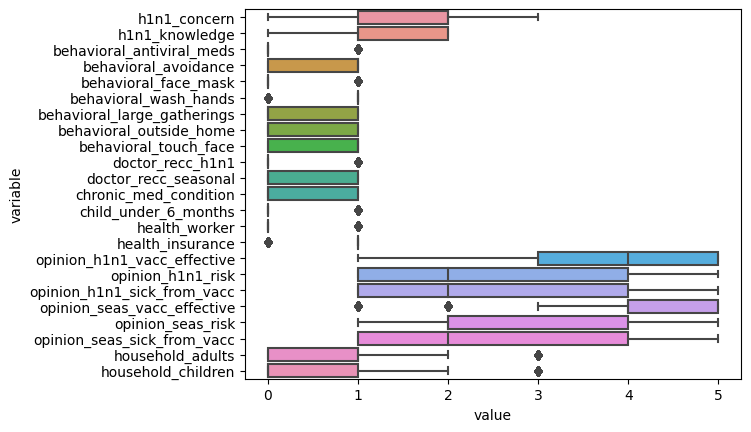

In [5]:
df1 = train_df.loc[:, train_df.dtypes == np.float64]
melt_cols = df1.columns
df1.reset_index(inplace=True)
df3 = pd.melt(df1, id_vars=['index'], value_vars=melt_cols)
sns.boxplot(df3, x='value', y='variable')

In [6]:
df2 = train_df.loc[:, train_df.dtypes == object]
obj_cols = df2.columns
for c in obj_cols:
    print(c, "\n", df2[c].unique())

age_group 
 ['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
education 
 ['< 12 Years' '12 Years' 'College Graduate' 'Some College' nan]
race 
 ['White' 'Black' 'Other or Multiple' 'Hispanic']
sex 
 ['Female' 'Male']
income_poverty 
 ['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' nan]
marital_status 
 ['Not Married' 'Married' nan]
rent_or_own 
 ['Own' 'Rent' nan]
employment_status 
 ['Not in Labor Force' 'Employed' 'Unemployed' nan]
hhs_geo_region 
 ['oxchjgsf' 'bhuqouqj' 'qufhixun' 'lrircsnp' 'atmpeygn' 'lzgpxyit'
 'fpwskwrf' 'mlyzmhmf' 'dqpwygqj' 'kbazzjca']
census_msa 
 ['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']
employment_industry 
 [nan 'pxcmvdjn' 'rucpziij' 'wxleyezf' 'saaquncn' 'xicduogh' 'ldnlellj'
 'wlfvacwt' 'nduyfdeo' 'fcxhlnwr' 'vjjrobsf' 'arjwrbjb' 'atmlpfrs'
 'msuufmds' 'xqicxuve' 'phxvnwax' 'dotnnunm' 'mfikgejo' 'cfqqtusy'
 'mcubkhph' 'haxffmxo' 'qnlwzans']
employment_occupation 
 [nan 'xgwztkwe' 'xtkaffoo' 'emcor

In [7]:
df2 = train_df.loc[:, train_df.dtypes == object]
obj_cols = df2.columns
for c in obj_cols:
    print(c, "\n", df2[c].value_counts())

age_group 
 65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_group, dtype: int64
education 
 College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: education, dtype: int64
race 
 White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64
sex 
 Female    15858
Male      10849
Name: sex, dtype: int64
income_poverty 
 <= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_poverty, dtype: int64
marital_status 
 Married        13555
Not Married    11744
Name: marital_status, dtype: int64
rent_or_own 
 Own     18736
Rent     5929
Name: rent_or_own, dtype: int64
employment_status 
 Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: employment_status, dtype: int64
hhs_geo_region 
 lzgpxyit    4297

In [8]:
cat_dict = {
    "age_group": {
        '65+ Years': 4, 
        '55 - 64 Years': 3, 
        '45 - 54 Years': 2,
        '35 - 44 Years': 1,
        '18 - 34 Years': 0
    },
    "education": {
        '< 12 Years': 0,
        '12 Years': 1,
        'Some College': 2,
        'College Graduate': 3 
    },
    "income_poverty": {
        'Below Poverty': 0,
        '<= $75,000, Above Poverty': 1,
        '> $75,000': 2
    }
}
cat_keys = cat_dict.keys()
for c in obj_cols:
    if c not in cat_keys:
        ft_dict = {n:i for i,n in enumerate(df2[c].unique(), 0) if str(n)!='nan'}
        cat_dict[c] = ft_dict 


In [9]:
train_df1 = train_df.copy()
for c in cat_dict.keys():
    ft_dict = cat_dict[c]
    train_df1[c] = train_df1[c].apply(lambda x: ft_dict[x] if str(x)!='nan' else x)


In [10]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [11]:
train_df1.isna().sum()/train_df1.shape[0]

h1n1_concern                   0.003445
h1n1_knowledge                 0.004343
behavioral_antiviral_meds      0.002658
behavioral_avoidance           0.007788
behavioral_face_mask           0.000711
behavioral_wash_hands          0.001573
behavioral_large_gatherings    0.003258
behavioral_outside_home        0.003070
behavioral_touch_face          0.004793
doctor_recc_h1n1               0.080878
doctor_recc_seasonal           0.080878
chronic_med_condition          0.036358
child_under_6_months           0.030704
health_worker                  0.030104
health_insurance               0.459580
opinion_h1n1_vacc_effective    0.014640
opinion_h1n1_risk              0.014528
opinion_h1n1_sick_from_vacc    0.014790
opinion_seas_vacc_effective    0.017299
opinion_seas_risk              0.019246
opinion_seas_sick_from_vacc    0.020107
age_group                      0.000000
education                      0.052683
race                           0.000000
sex                            0.000000


In [12]:
train_df1.shape

(26707, 36)

In [13]:
imputable_cols = list((train_df1.isna().sum()>0).index)
non_imputable_cols = [i for i in train_df1.columns if i not in imputable_cols]

In [14]:
# imputation 
from fancyimpute import KNN

imputer = KNN()
train_df2 = pd.DataFrame(np.round(imputer.fit_transform(train_df1.loc[:, imputable_cols])), columns=imputable_cols)


Imputing row 1/26707 with 2 missing, elapsed time: 213.762
Imputing row 101/26707 with 1 missing, elapsed time: 214.128
Imputing row 201/26707 with 3 missing, elapsed time: 214.191
Imputing row 301/26707 with 6 missing, elapsed time: 214.239
Imputing row 401/26707 with 0 missing, elapsed time: 214.470
Imputing row 501/26707 with 1 missing, elapsed time: 214.546
Imputing row 601/26707 with 3 missing, elapsed time: 214.631
Imputing row 701/26707 with 1 missing, elapsed time: 214.683
Imputing row 801/26707 with 3 missing, elapsed time: 214.766
Imputing row 901/26707 with 11 missing, elapsed time: 214.835
Imputing row 1001/26707 with 0 missing, elapsed time: 214.910
Imputing row 1101/26707 with 1 missing, elapsed time: 214.975
Imputing row 1201/26707 with 3 missing, elapsed time: 215.055
Imputing row 1301/26707 with 0 missing, elapsed time: 215.107
Imputing row 1401/26707 with 4 missing, elapsed time: 215.151
Imputing row 1501/26707 with 0 missing, elapsed time: 215.214
Imputing row 1601/2

In [15]:
imputable_cols

['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'household_adults',
 'household_children',
 'employment_industry',
 'employment_occupation',
 'h1n1_vaccine']

In [16]:
def pair_wise_scatter_plot(df, columns):

    pp = sns.pairplot(df[columns], height=28, aspect=1.8, kind='scatter', diag_kind='hist',
         dropna=True)
    fig = pp.fig
    fig.subplots_adjust(top=0.93, wspace=0.3)
    t = fig.suptitle('pair-wise correlation scatter plot', fontsize=14)

In [17]:
sub_df = train_df2.sample(n=1000)
pair_wise_scatter_plot(sub_df, train_df2.columns[1:10])

In [18]:
sub_train_df1 = train_df1.loc[:, non_imputable_cols]
train_df3 = pd.concat([train_df2, sub_train_df1], axis=1)
train_df3.shape

(26707, 36)

In [19]:
# convert float to int first
float_cols = train_df3.loc[:, train_df3.dtypes == np.float64].columns
train_df3[float_cols] = train_df3[float_cols].astype('int')
# convert all columns to categorical 
train_df3[train_df3.columns] = train_df3[train_df3.columns].astype('category')

In [20]:
train_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   h1n1_concern                 26707 non-null  category
 1   h1n1_knowledge               26707 non-null  category
 2   behavioral_antiviral_meds    26707 non-null  category
 3   behavioral_avoidance         26707 non-null  category
 4   behavioral_face_mask         26707 non-null  category
 5   behavioral_wash_hands        26707 non-null  category
 6   behavioral_large_gatherings  26707 non-null  category
 7   behavioral_outside_home      26707 non-null  category
 8   behavioral_touch_face        26707 non-null  category
 9   doctor_recc_h1n1             26707 non-null  category
 10  doctor_recc_seasonal         26707 non-null  category
 11  chronic_med_condition        26707 non-null  category
 12  child_under_6_months         26707 non-null  category
 13  h

In [21]:
train_df3.head()

h1n1_concern h1n1_knowledge behavioral_antiviral_meds behavioral_avoidance  \
0            1              0                         0                    0   
1            3              2                         0                    1   
2            1              1                         0                    1   
3            1              1                         0                    1   
4            2              1                         0                    1   

  behavioral_face_mask behavioral_wash_hands behavioral_large_gatherings  \
0                    0                     0                           0   
1                    0                     1                           0   
2                    0                     0                           0   
3                    0                     1                           1   
4                    0                     1                           1   

  behavioral_outside_home behavioral_touch_face doctor_recc_h1n1  \
0                       1                     1                0   
1                       1                     1                0   
2                       0                     0                0   
3                       0                     0                0   
4                       0                     1                0   

  doctor_recc_seasonal chronic_med_condition child_under_6_months  \
0                    0                     0                    0   
1                    0                     0                    0   
2                    0                     1                    0   
3                    1                     1                    0   
4                    0                     0                    0   

  health_worker health_insurance opinion_h1n1_vacc_effective  \
0             0                1                           3   
1             0                1                           5   
2             0                1                           3   
3             0                1                           3   
4             0                1                           3   

  opinion_h1n1_risk opinion_h1n1_sick_from_vacc opinion_seas_vacc_effective  \
0                 1                           2                           2   
1                 4                           4                           4   
2                 1                           1                           4   
3                 3                           5                           5   
4                 3                           2                           3   

  opinion_seas_risk opinion_seas_sick_from_vacc age_group education race sex  \
0                 1                           2         3         0    0   0   
1                 2                           4         1         1    0   1   
2                 1                           2         0         3    0   1   
3                 4                           1         4         1    0   0   
4                 1                           4         2         2    0   0   

  income_poverty marital_status rent_or_own employment_status hhs_geo_region  \
0              0              0           0                 0              0   
1              0              0           1                 1              1   
2              1              0           0                 1              2   
3              0              0           1                 0              3   
4              1              1           0                 1              2   

  census_msa household_adults household_children employment_industry  \
0          0                0                  0                   7   
1          1                0                  0                   1   
2          1                2                  0                   2   
3          2                0                  0                   2   
4          1                1                  0          

---

In [22]:
! pip install kmodes

In [23]:
from kmodes.kmodes import KModes

In [24]:
km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(train_df3)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 10031, cost: 353266.0
Run 1, iteration: 2/100, moves: 870, cost: 353266.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 10723, cost: 352071.0
Run 2, iteration: 2/100, moves: 2138, cost: 352071.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 9795, cost: 345841.0
Run 3, iteration: 2/100, moves: 3878, cost: 345246.0
Run 3, iteration: 3/100, moves: 824, cost: 344914.0
Run 3, iteration: 4/100, moves: 177, cost: 344914.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 11826, cost: 359056.0
Run 4, iteration: 2/100, moves: 2751, cost: 359056.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 7483, cost: 352967.0
Run 5, iteration:

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components=2)
pca.fit(train_df3.iloc[:, :-1])

PCA(n_components=2)

In [27]:
pca_ft =pca.fit_transform(train_df3.iloc[:, :-1])
pca_ft.shape

(26707, 2)

<AxesSubplot: >

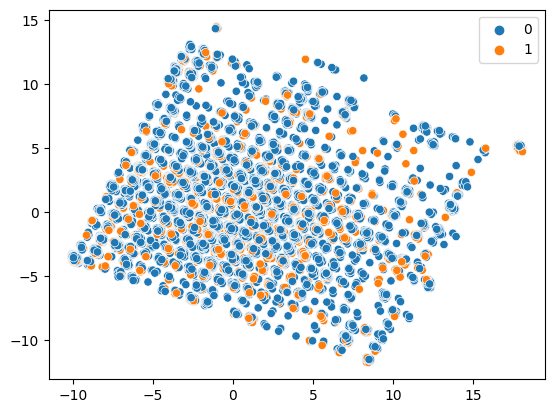

In [28]:
sns.scatterplot(x=pca_ft[:, 0], y=pca_ft[:, 1], hue=train_df3.iloc[:, -1].values)

---
Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc

In [34]:
clf = RandomForestClassifier(
    n_estimators=50,
    criterion='gini',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=False,
    class_weight='balanced'
)


In [38]:
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(model, X, y, index):
    y_predict = model.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

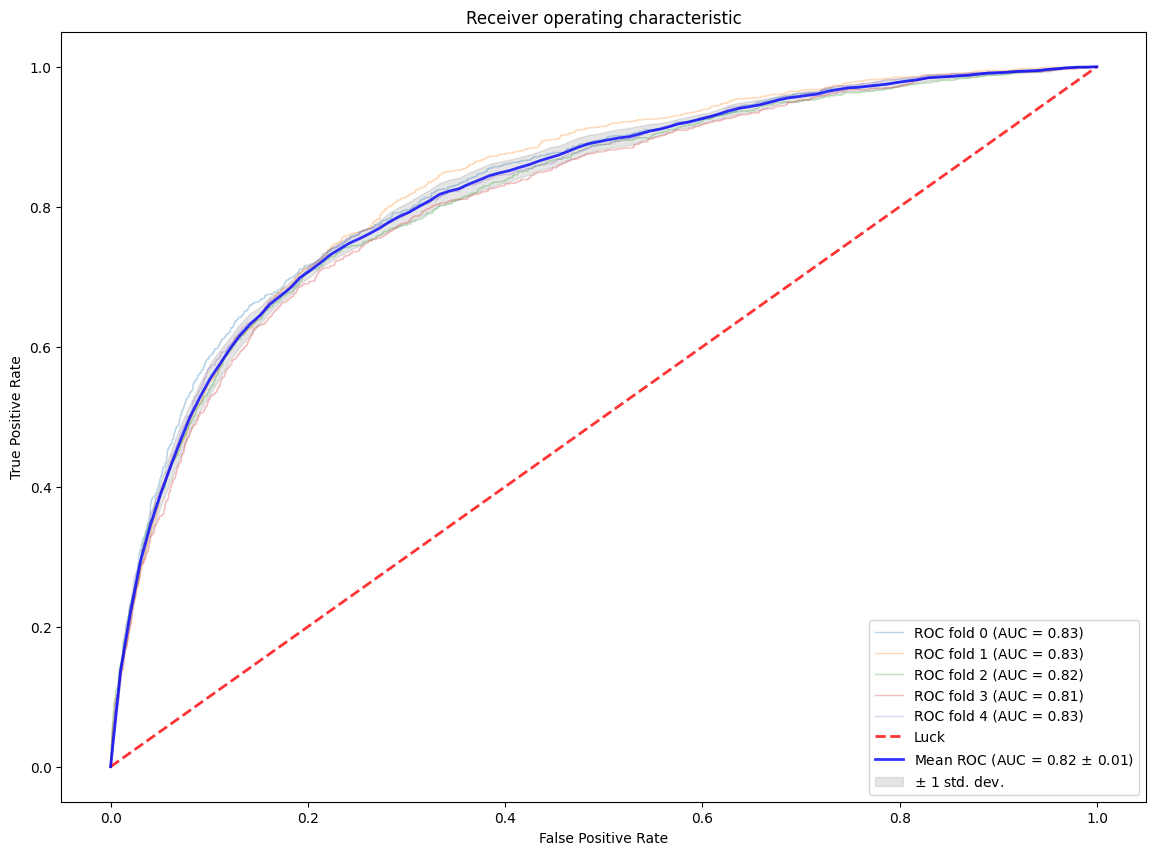

AUC Train  AUC Test
0   0.828842  0.831254
1   0.828811  0.834797
2   0.832008  0.819059
3   0.833890  0.813219
4   0.831749  0.826311

In [39]:
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []

X, y = train_df3.iloc[:, :-1], train_df3.iloc[:, -1]
for (train, test), i in zip(cv.split(X, y), range(5)):
    clf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(clf, X, y, train)
    fpr, tpr, auc_score = compute_roc_auc(clf, X, y, test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

---
SVM Classifier

In [37]:
from sklearn.svm import SVC

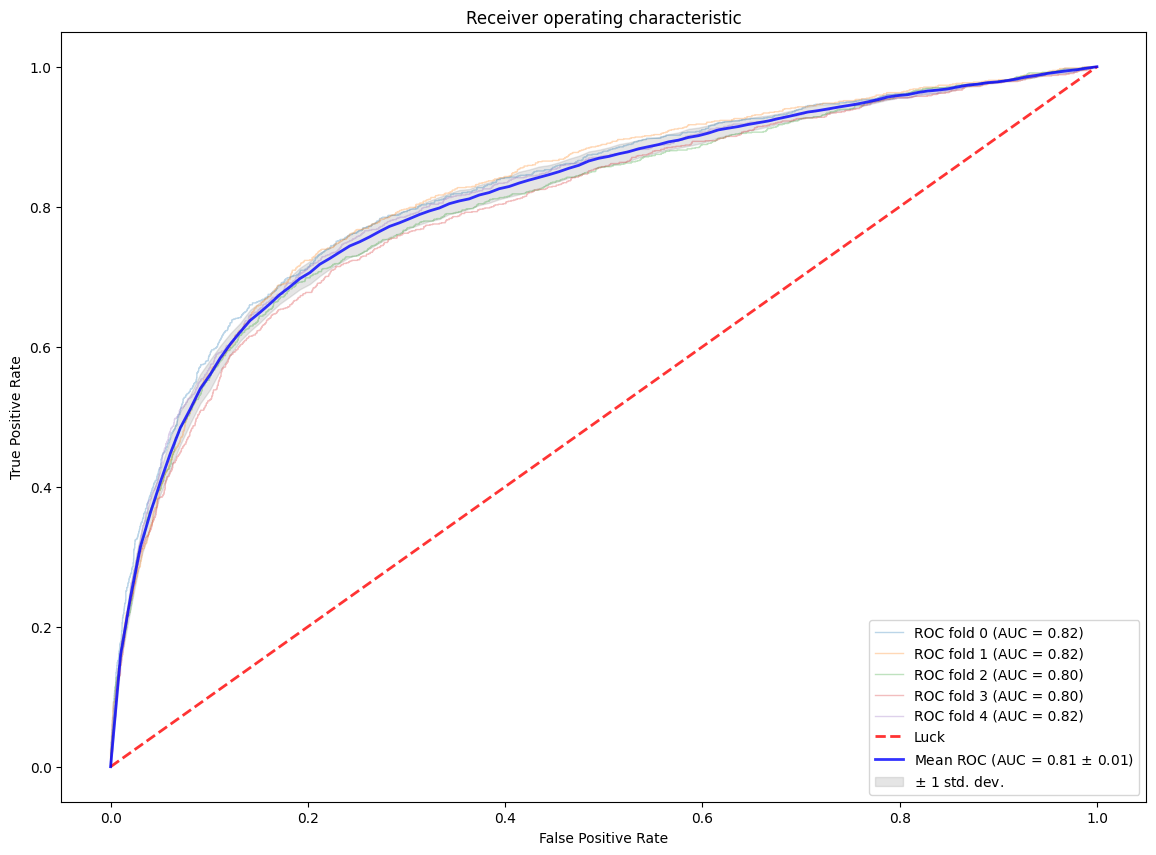

AUC Train  AUC Test
0   0.903421  0.822967
1   0.904185  0.822313
2   0.905425  0.804781
3   0.906328  0.798867
4   0.906000  0.816315

In [41]:
svm = SVC(gamma='auto', probability=True)

cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []

X, y = train_df3.iloc[:, :-1], train_df3.iloc[:, -1]
for (train, test), i in zip(cv.split(X, y), range(5)):
    svm.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(svm, X, y, train)
    fpr, tpr, auc_score = compute_roc_auc(svm, X, y, test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])